<a href="https://colab.research.google.com/github/An-tianqi/Machine-Learning/blob/main/Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(891, 12)
(418, 11)


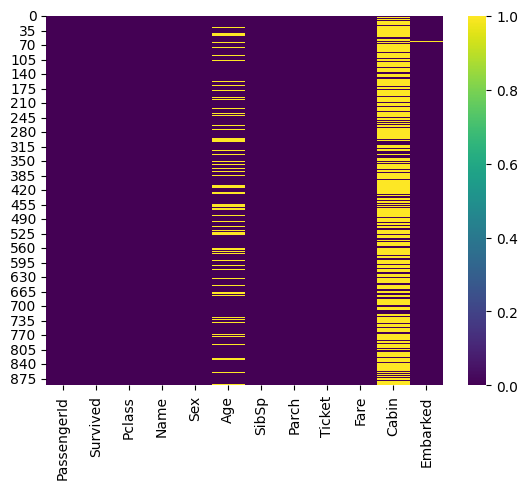

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gender_sub = pd.read_csv("./gender_submission.csv")
test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")

print(train.shape)
print(test.shape)

sns.heatmap(train.isnull(), cmap='viridis')
plt.show()



In [13]:
# le % d'âge des valeurs NaN

nan_percentage = (train['Age'].isnull().sum() / len(train)) * 100

print(nan_percentage)

19.865319865319865


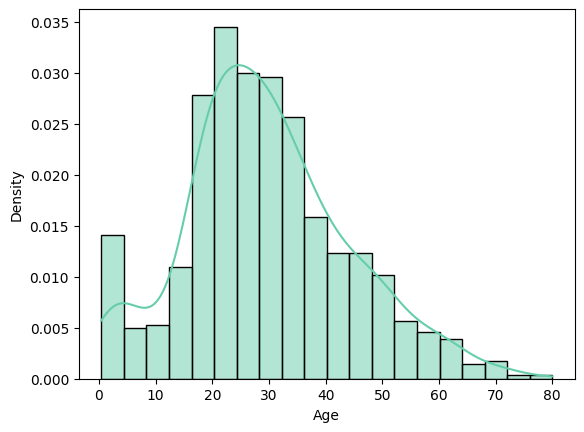

In [50]:
plt.figure()
sns.histplot(train['Age'], kde=True, stat="density", color="mediumaquamarine")
plt.show()


In [23]:
median = train['Age'].median()
mean = train['Age'].mean()

print(f"median : {median}")
print(f"moyenne : {mean}")

median : 28.0
moyenne : 29.69911764705882


In [25]:
# le % de Cabin des valeurs NaN

nan_percentage = (train['Cabin'].isnull().sum() / len(train)) * 100

print(nan_percentage)

77.10437710437711


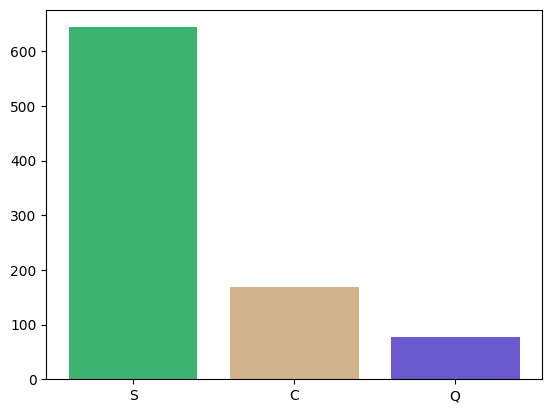

In [53]:
distribution = train['Embarked'].value_counts()

plt.bar(distribution.index, distribution.values, color=['mediumseagreen', 'tan', 'slateblue'])

plt.show()

In [68]:
# deep copy
newTrain = train.copy(deep=True)


newTrain["Age"] = newTrain["Age"].replace(np.nan, 28.0)

newTrain["Embarked"] = newTrain["Embarked"].replace(np.nan, "S")

my_cols = set(newTrain.columns)

my_cols.remove('Cabin')

newTrain2 = newTrain[my_cols]

newTrain2



<ipython-input-68-621b75d66359>:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  newTrain2 = newTrain[my_cols]


,PassengerId,SibSp,Embarked,Ticket,Survived,Parch,Pclass,Fare,Sex,Age,Name
0,1,1,S,A/5 21171,0,0,3,7.2500,male,22.0,"Braund, Mr. Owen Harris"
1,2,1,C,PC 17599,1,0,1,71.2833,female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,0,S,STON/O2. 3101282,1,0,3,7.9250,female,26.0,"Heikkinen, Miss. Laina"
3,4,1,S,113803,1,0,1,53.1000,female,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,S,373450,0,0,3,8.0500,male,35.0,"Allen, Mr. William Henry"
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,S,211536,0,0,2,13.0000,male,27.0,"Montvila, Rev. Juozas"
887,888,0,S,112053,1,0,1,30.0000,female,19.0,"Graham, Miss. Margaret Edith"
888,889,1,S,W./C. 6607,0,2,3,23.4500,female,28.0,"Johnston, Miss. Catherine Helen ""Carrie"""
889,890,0,C,111369,1,0,1,30.0000,male,26.0,"Behr, Mr. Karl Howell"


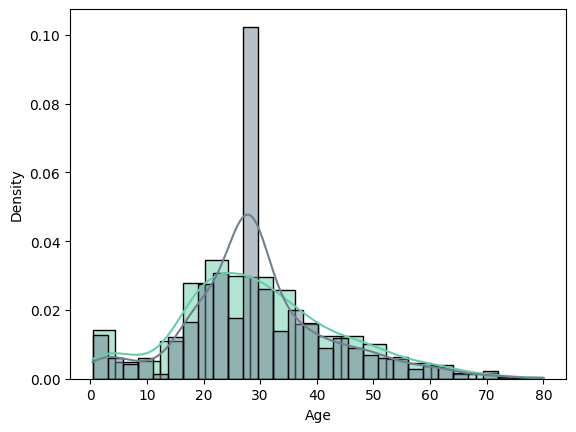

In [69]:
plt.figure()
sns.histplot(train['Age'], kde=True, stat="density", color="mediumaquamarine")
sns.histplot(newTrain2['Age'], kde=True, stat="density", color="slategrey")
plt.show()
